**Project Aim** <br>
This notebooks is to apply Support Vector Machines to a Classification problem

We will develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. The problem as been reformatted as a binary classification problem.

**Data Description** 
For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. Each feature represents the pixal intensity from 0 (white) to 255 (black)

Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. MNIST digit recognition is a well-studied problem in the ML community, and people have trained numerous models (Neural Networks, SVMs, boosted trees etc.) achieving error rates as low as 0.23% (i.e. accuracy = 99.77%, with a convolutional neural network).

We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters. Requirement to shuffle the data for different CV folds to ensure that each fold contains features for each class 

**Project Assumptions**

**Project Objective**
~~- Basic EDA of the MNIST Dataset~~
    - ~~How should pixal data be analysed? ~~
    - ~~Plot example of the pixel data~~ 
    - ~~What columns are identical or have very similar distributions?~~
- Benchmark model
    ~~- Majority Class~~~
    ~~- Stochastic Gradient Descent Classifier (good for large datasets and online learning)~~
- Understand the framework of support vector machines 
    ~~- Build a model that overfits a small proporion of the dataset and how to reach this conclusion~~
    ~~- Stratified Sampling~~
    - Understand methods to select features for classification problems
    - Include bias/variance trade off analysis
    ~~- Cross Validation Strategy (Shuffle data & Stratified Sample)~~
    ~~- Sci-Kit Learns Transformation Pipeline (page 66 - Hands on ML with Sci-kit Learn sklearn.pipeline import Pipeline)~~
~~- Application of multiple Kernal Types and model performance analysis~~
~~- Understand and apply an appropriate loss function ~~
    ~~- Hinge Loss~~
~~- Feature Selection/Scaling~~
   ~~- Add randomised features~~
  ~~- Implement Scaling/Normalisation using Sci-kit learn Pipeline~~
- ~~Hyperparameter Tuning (Implement and understand grid search plus evaluate where the model over/underfits)~~
    ~~- Grid Search for parameters (page 72 - Hands on ML): Determine which parameters need to be optimised ~~
- Investigate if SVM model can be plotted 
    - Error evaluation: Where does the system commonly make mistakes and how can this be improved?
    - Decision boundary
~~Decision function in sklearn~~
~~- Confusion Matrix ~~
~~- Precision-Recall Curve~~
~~- RoC Curve~~
- Tidy up the final solution 
    - Neatly store: Date/Data set/Pickle Model/Performance score
    - Dockerise
- Document brief conclusions 
    - Think where bias might be incorporated in the model and how this can be treated --- Poor quality measures?
    - What is the scope that the model can predict and where could it have issues generalising e.g. new categories?
- Document and understand 3 key learning from other kaggle solutions
    ~~- https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm~~
    ~~- https://www.kaggle.com/azzion/svm-for-beginners-tutorial~~
    ~~- https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine~~
    ~~- https://www.kaggle.com/residentmario/kernels-and-support-vector-machine-regularization~~

**Support Vector Machine Notes**
~~- Hands-On Machine Learning with Scikit-Learn & Tensorflow~~
~~- Mastering Predictive Analytics with R~~
~~- Andrew Ng SVM <br>~~
~~https://www.youtube.com/watch?v=XfyR_49hfi8&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=74~~

**Parameters**
~~- Choice of parameter C~~
~~- Choice of kernel (similarity function)~~
    ~~- Linear SVM uses no Kernel: Standard linear classifier (use when large number of features but small dataset)~~
    ~~- Gaussian: Will require selection of parameter sigma^2 (use when small number of features but large training set)~~
    ~~- **Perform feature scaling before implementing a gaussian kernel**~~

**Algorithm Performance on MNIST Dataset** <br>
- For MNIST Data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data
- SVM will be used in relation to a binary classification problem for the initial project 
- Note that pictures can be sensitive to rotation and imageing shifting which can increase likelihood of error

**Model Performances** <br>
- Benchmark Model:
- Optimal Performance (Personal): 
- Optimal Performance (Kaggle): Error rates as low as 0.23% (99.77 Accuracy)

**Out of Scope**
- Missing data treatment 
- Outlier treatment
- Feature transformations and interactions (product/sum etc.)


**References** <br>
~~https://www.kaggle.com/jwlee508/data-analysis-for-kaggle-mnist~~ <br> 
~~https://towardsdatascience.com/an-intro-to-kernels-9ff6c6a6a8dc~~ <br>
~~https://www.researchgate.net/publication/230800948_The_Secrets_to_Managing_Business_Analytics_Projects~~ <br>
https://machinelearningmastery.com/feature-selection-subspace-ensemble-in-python/ <br>
https://towardsdatascience.com/one-potential-cause-of-overfitting-that-i-never-noticed-before-a57904c8c89d <br>

In [48]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/SupportVectorMachines/notebooks'

In [50]:
train_data = pd.read_csv('/Users/Rej1992/Desktop/SVM_Data/mnist_train.csv')
test_data = pd.read_csv('/Users/Rej1992/Desktop/SVM_Data/mnist_test.csv')

In [51]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [52]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


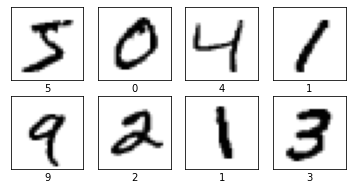

In [53]:
X_t = train_data.drop(["label"], axis=1)
Y_t = train_data.label.values

plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000, 28, 28)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

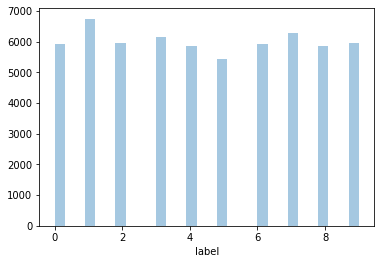

In [54]:
sns.distplot(train_data['label'], kde = False, bins = 30)

In [55]:
train_data = train_data[(train_data.label == 1) | (train_data.label == 3)]
test_data = test_data[(test_data.label == 1) | (test_data.label == 3)]

In [56]:
# Create a representative sample of the data set
train_data = train_data.sample(n = 2000, replace = False) 
test_data = test_data.sample(n = 2000, replace = False) 

In [57]:
# Remove duplicated columns 
train_data = train_data.loc[:,~train_data.columns.duplicated()]
test_data = test_data.loc[:,~test_data.columns.duplicated()]

In [58]:
def _remove_columns_unique_values(data):
    
    nunique = data.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    
    return data.drop(cols_to_drop, axis=1)

test_data = _remove_columns_unique_values(test_data)
train_data = _remove_columns_unique_values(train_data)

In [59]:
# Check column overlap
print(test_data.columns.difference(train_data.columns))
print(train_data.columns.difference(test_data.columns))

Index(['10x25', '11x25', '12x25', '14x3', '15x3', '16x27', '17x26', '17x27',
       '18x26', '20x27', '21x27', '24x2', '24x24', '27x10', '27x17', '27x18',
       '27x19', '27x8', '27x9', '28x10', '28x11', '28x13', '28x9', '3x10',
       '3x11', '3x12', '4x24', '5x4', '6x2', '6x3'],
      dtype='object')
Index(['10x2', '10x27', '11x2', '11x27', '12x3', '13x3', '14x1', '15x26',
       '15x4', '19x2', '20x26', '21x26', '22x2', '22x26', '23x26', '24x25',
       '24x26', '25x3', '26x22', '26x23', '26x3', '27x20', '27x21', '27x22',
       '27x23', '3x17', '3x18', '6x26', '7x2', '7x3', '8x2'],
      dtype='object')


In [60]:
# Retain only columns that exist in the test data set
train_data = train_data.drop(train_data.columns.difference(test_data.columns), axis=1)
test_data = test_data.drop(test_data.columns.difference(train_data.columns), axis=1)

In [61]:
# Verfiy the data type 
train_data.dtypes.unique()

array([dtype('int64')], dtype=object)

In [62]:
# Remove missing targets
train_data = train_data[train_data.label.notnull()]

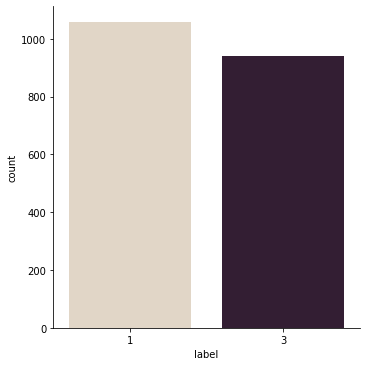

In [63]:
# Analyse the distribution of the target
import seaborn as sns
sns.catplot(x="label", kind="count", palette="ch:.25", data=train_data)

In [64]:
train_data.std().sort_values(ascending=False).head(10)

18x14    116.279516
17x15    114.983394
17x14    114.469828
23x11    114.261851
18x15    113.919800
7x14     113.737063
19x14    113.444282
22x16    113.398053
23x16    113.282598
8x19     112.971024
dtype: float64

In [65]:
train_data = train_data.iloc[:, : 50] # Train on first 50 columns

In [66]:
train_data.describe()

,label,3x13,3x14,3x15,3x16,4x6,4x7,4x8,4x9,4x10,...,5x22,5x23,5x24,5x25,6x4,6x5,6x6,6x7,6x8,6x9
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.941000,0.012000,0.207000,0.168000,0.130000,0.150000,0.243500,0.424000,0.513500,0.758000,...,7.263500,3.064000,0.591000,0.125500,0.200000,0.65750,3.200000,6.991500,13.302000,23.482000
std,0.998508,0.391066,6.653742,5.515069,5.166957,5.789582,7.705381,9.808737,9.452169,11.568118,...,36.361135,23.297796,10.829606,5.612531,5.988483,8.93113,22.975159,35.291985,48.332441,64.684788
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.000000,15.000000,245.000000,236.000000,229.000000,255.000000,254.000000,254.000000,254.000000,254.000000,...,255.000000,255.000000,255.000000,251.000000,255.000000,253.00000,254.000000,254.000000,255.000000,255.000000


In [67]:
train_data.isnull().sum()

label    0
3x13     0
3x14     0
3x15     0
3x16     0
4x6      0
4x7      0
4x8      0
4x9      0
4x10     0
4x11     0
4x12     0
4x13     0
4x14     0
4x15     0
4x16     0
4x17     0
4x18     0
4x19     0
4x20     0
4x21     0
4x22     0
4x23     0
5x5      0
5x6      0
5x7      0
5x8      0
5x9      0
5x10     0
5x11     0
5x12     0
5x13     0
5x14     0
5x15     0
5x16     0
5x17     0
5x18     0
5x19     0
5x20     0
5x21     0
5x22     0
5x23     0
5x24     0
5x25     0
6x4      0
6x5      0
6x6      0
6x7      0
6x8      0
6x9      0
dtype: int64

<AxesSubplot:>

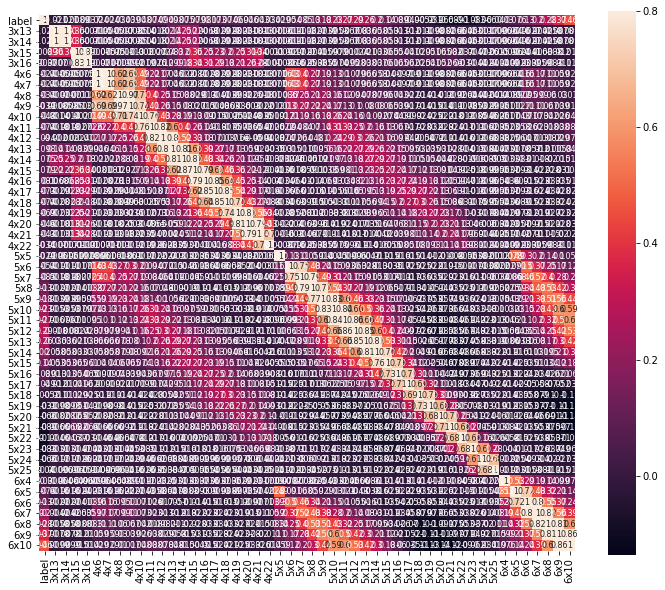

In [21]:
corrmat = train_data.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,
            vmax=0.8,
            square=True,
            annot=True,
            annot_kws={'size':8})

In [68]:
# Feature Engineering 
## Discretise continuous variables 
## Create a set of randomised features 
import random

random.seed(1234)
train_data['uniform_random'] = np.random.uniform(0,1,len(train_data))
train_data['log_norm_random'] = np.random.lognormal(0, 1, len(train_data))
train_data['norm_random'] = np.random.normal(0, 1, len(train_data))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [69]:
# spot check machine learning algorithms on the adult imbalanced dataset
# https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [173]:
# Establish X and y & label encode the target variable to have the classes 0 and 1
train_data.label = np.where(train_data.label == 1, 0, 1) # 0 == 1 and 1 == 3
y = LabelEncoder().fit_transform(train_data.label)
X = train_data.drop('label', 1)
#num_ix = X.select_dtypes(include=['int64', 'float64']).columns

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [185]:
# Create a benchmark dummy model
random.seed(1234)

def _generate_dummy_model(X=X, y=y):
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.2, random_state = 10)

    for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
        dummy_maj = DummyClassifier(strategy=strat).fit(X_train, y_train)
        print(strat)
        print("Train Stratergy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, y_train)))
        print("Test Stratergy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, y_train)))
        print("Cross Validation: Training Data \n ", cross_val_score(dummy_maj, X_train, y_train, cv = 10, scoring = 'accuracy'))
        print("""""")
        
_generate_dummy_model()

stratified
Train Stratergy :stratified 
 Score :0.50
Test Stratergy :stratified 
 Score :0.51
Cross Validation: Training Data 
  [0.525 0.4   0.45  0.425 0.35  0.5   0.325 0.375 0.5   0.425]

most_frequent
Train Stratergy :most_frequent 
 Score :0.51
Test Stratergy :most_frequent 
 Score :0.51
Cross Validation: Training Data 
  [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.525 0.525 0.525]

prior
Train Stratergy :prior 
 Score :0.51
Test Stratergy :prior 
 Score :0.51
Cross Validation: Training Data 
  [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.525 0.525 0.525]

uniform
Train Stratergy :uniform 
 Score :0.48
Test Stratergy :uniform 
 Score :0.53
Cross Validation: Training Data 
  [0.475 0.6   0.4   0.525 0.35  0.35  0.425 0.475 0.5   0.4  ]



In [186]:
# Define models to test: Support Vector Machine 
def get_models():
    models, names = list(), list()
    
    # DummyClassifier
    models.append(DummyClassifier(strategy='most_frequent')) # Best performing dummy classifier
    names.append('Dummy_MostFreq')
    
    # Stochastic Gradient Descent Classifier (This should be equal to )
    models.append(SGDClassifier(loss="hinge", penalty="l2"))
    names.append('SGD_SVM')
    
    # SVM Linear Kernel
    models.append(SVC(kernel='linear'))
    names.append('SVM_Linear')
    
    # SVM
    #models.append(SVC(kernel='rbf', gamma='scale'))
    #names.append('SVM_Gamma')
    
    # GBM
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('GBM')
    
    return models, names

In [231]:
# evaluate each model
train_results = []
test_results = []

y_preds_train = []
y_preds_test = []

def _generate_model_results(algorithm=models, model_name=names, predictors=X, target=y):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        print(model)
        

        # Create y_preds 
        y_preds_train = model.predict(X_train)
        y_preds_test = model.predict(X_test)

        X['model_actuals'] = np.hstack([y_train, y_test]) # Actuals 
        X.loc[:, names[i]] = np.hstack([y_preds_train, y_preds_test]) # Model Predictions
        
        
        # Cross Validate and produce results
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
        train_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        test_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

        train_results.append(train_scores)
        test_results.append(test_scores)

        print("""Train Results""")
        print('> %s %.3f (%.3f)' % (model, mean(train_scores), std(train_scores)))
        print(train_scores)
        print("Train Data Accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_preds_train), "\n")

        print("""Testing Results""")
        print('> %s %.3f (%.3f)' % ('Model', mean(test_scores), std(test_scores)))
        print(test_scores)
        print("Test Data Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_preds_test), "\n")
        
    # plot the results
    plt.boxplot(train_results, labels=names, showmeans=True)
    plt.show()
        
    return X#, y_test, y_preds_test

DummyClassifier(strategy='most_frequent')
Train Results
> DummyClassifier(strategy='most_frequent') 0.508 (0.011)
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.525 0.525 0.525]
Train Data Accuracy: 0.5075 

Testing Results
> Model 0.535 (0.003)
[0.53125 0.53125 0.53125 0.53125 0.5375  0.5375  0.5375  0.5375  0.5375
 0.5375 ]
Test Data Accuracy: 0.535 

SGDClassifier()
Train Results
> SGDClassifier() 0.662 (0.058)
[0.65  0.75  0.725 0.65  0.65  0.525 0.675 0.625 0.675 0.7  ]
Train Data Accuracy: 0.6775 

Testing Results
> Model 0.628 (0.052)
[0.66875 0.58125 0.69375 0.63125 0.69375 0.6625  0.5875  0.5875  0.64375
 0.53125]
Test Data Accuracy: 0.625625 

SVC(kernel='linear')
Train Results
> SVC(kernel='linear') 0.640 (0.037)
[0.675 0.625 0.6   0.625 0.625 0.7   0.6   0.7   0.65  0.6  ]
Train Data Accuracy: 0.6975 

Testing Results
> Model 0.713 (0.026)
[0.7375  0.725   0.7     0.7125  0.7375  0.7375  0.74375 0.675   0.68125
 0.675  ]
Test Data Accuracy: 0.681875 

GradientBoostingClassifi

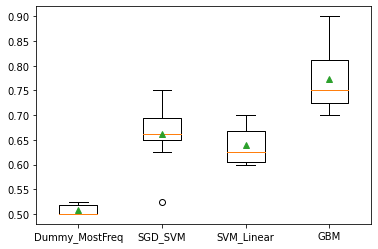

In [232]:
Model_Results = _generate_model_results()

In [240]:
# Confusion Matrix -- Function 4
for i in names:
    print(i)
    print(confusion_matrix(X.model_actuals, X[i]))
    print("""""")

Dummy_MostFreq
[[1059    0]
 [ 941    0]]

SGD_SVM
[[670 389]
 [339 602]]

SVM_Linear
[[939 120]
 [510 431]]

GBM
[[879 180]
 [285 656]]



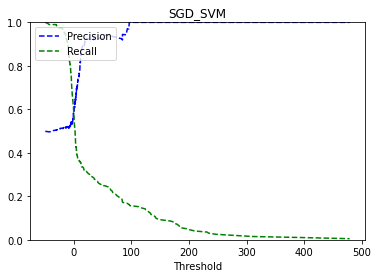

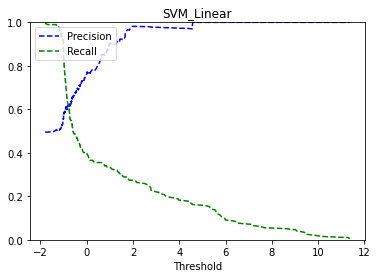

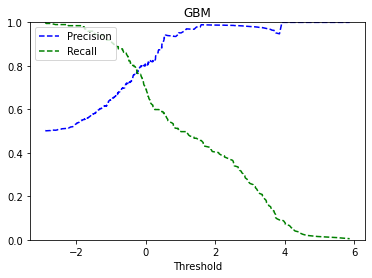

In [238]:
## Precision-Recall Curves
precisions = []
recalls = []
thresholds = []

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

def _generate_precision_recall_results(algorithm=models, predictors=X, target=y, name = names):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # Cross Validation Strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        
        if(i != 0):
            y_decision_func = cross_val_predict(model,  X_train, y_train, method='decision_function', cv=cv)
            
            # Create the results for precision and recall
            precisions, recalls, thresholds = precision_recall_curve(y_train, y_decision_func)
            
            # Create a plot
            plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
            plt.title(name[i])
            plt.show()
        
_generate_precision_recall_results()

RoC_AuC_Score:  SGD_SVM 0.7059088294866344
RoC_AuC_Score:  SVM_Linear 0.7056087619714436
RoC_AuC_Score:  GBM 0.8596059113300492


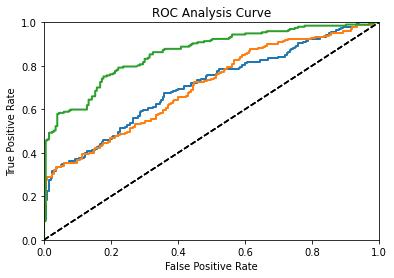

In [251]:
fpr = []
tpr = []
roc_thresholds = []

def plot_roc_curve(fpr, tpr, roc_thresholds, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

def _generate_roc_results(algorithm=models, predictors=X, target=y, name = names):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # Cross Validation Strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        
        # # RoC Curve --- Binary Classifiers & Recall Versus False Positive Rate (Ratio of negative instances that are incorrectly classified as positive)
        if(i != 0):
            y_decision_func = cross_val_predict(model,  X_train, y_train, method='decision_function', cv=cv)
            fpr, tpr, roc_thresholds = roc_curve(y_train, y_decision_func)
            
            print('RoC_AuC_Score: ', name[i],roc_auc_score(y_train, y_decision_func))
            
            plot_roc_curve(fpr, tpr, roc_thresholds)
            #plt.legend(name[i])
            plt.title('ROC Analysis Curve')
            plt.show
        
_generate_roc_results()

In [ ]:
#Attempt differing values of C
for this_C in [1,3,5]:
    clf = SVC(kernel='linear',C=this_C).fit(X, y) ## Linear only has C parameter
    clf2 = LinearSVC(C=this_C).fit(X,y)
    scoretrain = clf.score(X,y)
    scoretest  = clf.score(X_test, Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,
                                                                                          scoretrain,
                                                                                          scoretest))

# for this_C in [1,3,5,10,40,60,80,100]:
#     clf2 = LinearSVC(C=this_C).fit(X,y)
#     scoretrain = clf2.score(X,y)
#     scoretest  = clf2.score(X_test, Y_test)
#     print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,
#                                                                                           scoretrain,
#                                                                                           scoretest))

    
# for this_C in [1,3,5,10,40,60,80,100]:
#     clf3 = SVC(kernel='rbf',C=this_C).fit(X,y) ## # SMV with RBF KERNAL AND ONLY C PARAMETER 
#     scoretrain = clf3.score(X,y)
#     scoretest  = clf3.score(X_test, Y_test)
#     print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,
#                                                                                           scoretrain,
#                                                                                           scoretest))

    
# # SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
# for this_gamma in [.1,.5,.10,.25,.50,1]:
#     for this_C in [1,5,7,10,15,25,50]:
#         clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
#         clf3train = clf3.score(X_train,Y_train)
#         clf3test  = clf3.score(X_test,Y_test)
#         print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))


In [ ]:
# Grid Search
param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}

GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

GS.fit(X_train,Y_train)

print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

In [ ]:
## Visualise the model decision boundary 

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

In [ ]:
## Visualise the model decision boundary 
h = .02  # step size in the mesh
C_param = 1 # No of neighbours

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()